# The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments

### input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
### output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
### input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

In [ ]:
# 下載 glove 100
# https://nlp.stanford.edu/data/glove.6B.zip
# https://drive.google.com/file/d/1h_KnBJ-BZUcTrXysFhXL5M_-WJzMcw_J/view?usp=share_link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/20220821-Python-第四階段-Sun/chap28-Solution-1st reply of customer email/CH48.Keras_Imdb_Introduce活用案例研究/glove.6B.100d.txt" .

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
glove = []
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    glove = f.readlines()

In [ ]:
# 轉字典方式
{'the': [-0.038194, -0.24487]}
dict( [ ('the', [-0.038194, -0.24487]) , ('that', [-0.038194, -0.24487]) ] )

{'the': [-0.038194, -0.24487], 'that': [-0.038194, -0.24487]}

In [ ]:
# dict([ (glove[0].split()[0] , np.array(glove[0].split()[1:]).astype(np.float32) )])

In [ ]:
import numpy as np
dict([( glove[-1].split()[0] , np.array(glove[-1].split()[1:]).astype(np.float32))])

{'sandberger': array([ 0.28365  , -0.6263   , -0.44351  ,  0.2177   , -0.087421 ,
        -0.17062  ,  0.29266  , -0.024899 ,  0.26414  , -0.17023  ,
         0.25817  ,  0.097484 , -0.33103  , -0.43859  ,  0.0095799,
         0.095624 , -0.17777  ,  0.38886  ,  0.27151  ,  0.14742  ,
        -0.43973  , -0.26588  , -0.024271 ,  0.27186  , -0.36761  ,
        -0.24827  , -0.20815  ,  0.22128  , -0.044409 ,  0.021373 ,
         0.24594  ,  0.26143  ,  0.29303  ,  0.13281  ,  0.082232 ,
        -0.12869  ,  0.1622   , -0.22567  , -0.060348 ,  0.28703  ,
         0.11381  ,  0.34839  ,  0.3419   ,  0.36996  , -0.13592  ,
         0.0062694,  0.080317 ,  0.0036251,  0.43093  ,  0.01882  ,
         0.31008  ,  0.16722  ,  0.074112 , -0.37745  ,  0.47363  ,
         0.41284  ,  0.24471  ,  0.075965 , -0.51725  , -0.49481  ,
         0.526    , -0.074645 ,  0.41434  , -0.1956   , -0.16544  ,
        -0.045649 , -0.40153  , -0.13136  , -0.4672   ,  0.18825  ,
         0.2612   ,  0.16854  ,  0

In [ ]:
import numpy as np
glove_embedded = dict([ ( line.split()[0], np.array(line.split()[1:], dtype='float32') ) for line in glove])

In [ ]:
glove_embedded.get('sashimi')

array([-0.65059  ,  0.2016   ,  0.68666  ,  0.65851  , -0.29464  ,
       -1.0846   ,  0.0052665, -0.35541  ,  0.69432  ,  0.58906  ,
       -0.33003  ,  0.17822  ,  0.18632  ,  1.0461   ,  0.45654  ,
        0.42563  ,  0.65376  , -0.089483 , -0.29322  ,  0.4492   ,
        0.5301   , -0.33547  , -0.1022   , -1.0246   ,  1.0674   ,
        0.79905  , -0.92671  , -0.10377  , -0.16778  , -0.037666 ,
       -0.39318  , -0.12018  , -0.90603  ,  0.21761  ,  0.11231  ,
        0.47103  , -0.23728  , -0.3534   ,  0.03686  , -0.82812  ,
        0.41744  , -0.78007  , -0.36368  ,  0.1253   ,  1.1368   ,
        0.13796  , -0.12501  , -0.19405  , -0.27672  , -0.061772 ,
       -0.4815   , -0.027073 , -0.74655  ,  0.12224  , -0.73215  ,
        1.15     ,  0.55559  , -0.078571 , -0.20306  , -0.0090857,
       -0.38041  ,  0.85508  ,  0.25461  ,  0.044044 , -0.47575  ,
       -0.84642  ,  0.41493  , -0.46109  ,  0.3211   ,  0.23407  ,
       -0.077311 , -0.071668 ,  0.34068  ,  0.86601  , -0.7776

In [ ]:
# 根據單字找出對應新接近的單字
from sklearn.metrics.pairwise import cosine_similarity
glove_embedded['sushi'] , glove_embedded['sashimi']
print(np.array(cosine_similarity(glove_embedded['sushi'].reshape(1,-1), glove_embedded['sashimi'].reshape(1,-1))).ravel())
print(np.array(cosine_similarity(glove_embedded['sushi'].reshape(1,-1), glove_embedded['food'].reshape(1,-1))).ravel())
print(np.array(cosine_similarity(glove_embedded['korea'].reshape(1,-1), glove_embedded['taiwan'].reshape(1,-1))).ravel())
print(np.array(cosine_similarity(glove_embedded['ibm'].reshape(1,-1), glove_embedded['microsoft'].reshape(1,-1))).ravel())

[0.75309527]
[0.37081674]
[0.6876485]
[0.78836554]


In [ ]:
# "sushi" and "sashimi"
glove_embedded['sushi'].reshape(1,-1)

array([[-0.20231  , -0.054136 ,  0.71591  ,  0.24348  , -0.3208   ,
        -0.5493   ,  0.35523  , -0.059888 ,  0.29657  ,  0.57077  ,
        -0.23835  , -0.07604  ,  0.65001  ,  0.67834  , -0.15304  ,
         0.22191  ,  0.41524  , -0.38757  , -0.57889  ,  0.13278  ,
         0.43995  ,  0.19359  , -0.59421  , -1.6094   ,  0.39598  ,
         0.90724  , -0.84931  , -0.57491  , -0.11077  ,  0.091525 ,
        -0.5114   ,  0.55003  ,  0.16396  ,  0.19131  ,  0.082782 ,
         1.286    , -0.047859 , -0.43553  , -0.039591 , -1.5753   ,
         0.20889  , -0.70649  , -0.30272  , -0.34991  ,  0.76505  ,
         0.28626  , -0.54499  , -0.045612 , -0.0049366,  0.29781  ,
        -0.44939  , -0.51989  , -0.5441   ,  0.1739   , -1.2378   ,
         0.24574  ,  0.090844 ,  0.62769  ,  0.1613   ,  0.092406 ,
        -0.60416  ,  0.82966  ,  0.33952  ,  0.15303  , -0.31555  ,
        -0.15873  ,  0.16653  , -0.35765  ,  0.33215  , -0.15787  ,
        -0.622    ,  0.19098  ,  0.50372  ,  0.7

In [ ]:
# exam
# 根據指定的單字
# 去 glove_embedded 找前五名跟該單字最有關係的單字
# 當我輸入 ibm 幫忙找 前五名跟 ibm 單字 關係者

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.python.keras.layers.embeddings import Embedding 
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# prepare tokenizer
# 字編碼 會從 1 開始，不是從 0 開始
t = Tokenizer()
t.fit_on_texts(docs)
t.word_index


{'work': 1,
 'done': 2,
 'good': 3,
 'effort': 4,
 'poor': 5,
 'well': 6,
 'great': 7,
 'nice': 8,
 'excellent': 9,
 'weak': 10,
 'not': 11,
 'could': 12,
 'have': 13,
 'better': 14}

In [ ]:
# 範例
# run 
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
# 驗證 token.word_index(總字個數) <= num_words(單字向量長度)
corpus =['Lewis Yang', 'Ada-Kuo', "Julia Li and BoBo Yang", 'Ada Yang']
token = Tokenizer()
token.fit_on_texts(corpus)
print(dir(token))
print('\n')
print('每一字頻率\n',token.word_counts)
print('每一字代碼 started from 1\n',token.word_index)
print('每一句話轉代碼\n', token.texts_to_sequences( corpus[1].lower().split() ) )
print('每一句話的字轉矩陣\n', token.texts_to_matrix( corpus[1].lower().split() ) )
print('每一字轉矩陣長度',token.num_words)
print('多少數據',token.document_count)
print('補齊數量',sequence.pad_sequences(  token.texts_to_sequences( corpus[1].lower().split() ) ,  maxlen=4) )

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_keras_api_names', '_keras_api_names_v1', 'analyzer', 'char_level', 'document_count', 'filters', 'fit_on_sequences', 'fit_on_texts', 'get_config', 'index_docs', 'index_word', 'lower', 'num_words', 'oov_token', 'sequences_to_matrix', 'sequences_to_texts', 'sequences_to_texts_generator', 'split', 'texts_to_matrix', 'texts_to_sequences', 'texts_to_sequences_generator', 'to_json', 'word_counts', 'word_docs', 'word_index']


每一字頻率
 OrderedDict([('lewis', 1), ('yang', 3), ('ada', 2), ('kuo', 1), ('julia', 1), ('li', 1), ('and', 1), ('bobo', 1)])
每一字代碼 started from 1
 {'yang': 1, 'ada': 2, 'lewis': 3, 'kuo': 4, 'julia': 5, 'li': 6, 'and': 7, 'bobo': 8}


In [ ]:
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]


In [ ]:
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [ ]:
# 將 Glove 放置到 變數
embeddings_index = glove_embedded
print('Loaded %s word vectors.' % len(embeddings_index))


Loaded 400000 word vectors.


In [ ]:
for word, i in t.word_index.items():
	print(word, i)
	

work 1
done 2
good 3
effort 4
poor 5
well 6
great 7
nice 8
excellent 9
weak 10
not 11
could 12
have 13
better 14


In [ ]:
embeddings_index.get('better')

array([-0.047543,  0.51914 ,  0.34284 , -0.09606 , -0.4474  , -0.3707  ,
       -0.12871 , -0.50328 , -0.26129 , -0.090832, -0.060988, -0.36865 ,
        0.21908 , -0.35645 ,  0.32993 , -0.29609 , -0.018273,  0.16066 ,
       -0.35906 ,  0.67961 ,  0.13921 ,  0.12728 , -0.097452, -0.15845 ,
       -0.24286 , -0.26502 , -0.41235 , -1.0086  , -0.055266,  0.051596,
       -0.24647 ,  0.69692 , -0.010224, -0.14127 ,  0.95922 ,  0.40876 ,
       -0.54785 ,  0.3935  , -0.090709, -0.22418 ,  0.0491  , -0.34819 ,
       -0.044169, -0.42278 , -0.63473 ,  0.070979,  0.13305 , -0.5402  ,
       -0.013333, -1.6006  , -0.39543 , -0.17326 , -0.23691 ,  1.3752  ,
        0.20951 , -2.4743  ,  0.48555 ,  0.20272 ,  1.5026  , -0.11918 ,
       -0.29868 ,  0.6899  , -0.87974 , -0.041267,  0.58979 ,  0.13067 ,
        0.30467 ,  0.3365  ,  0.21907 , -0.17314 ,  0.22645 , -0.18273 ,
        0.15126 , -0.44416 ,  0.66597 ,  0.03561 , -0.36268 , -0.2546  ,
       -0.062423, -0.13725 ,  0.53822 ,  0.22712 , 

In [ ]:
vocab_size

15

In [ ]:
# 將 keras-word-代碼表-轉換成-glove-向量特徵值
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11619   ,  0.45447001, -0.69216001, ..., -0.54737002,
         0.48822001,  0.32246   ],
       [-0.2978    ,  0.31147   , -0.14937   , ..., -0.22709   ,
        -0.029261  ,  0.4585    ],
       ...,
       [ 0.05869   ,  0.40272999,  0.38633999, ..., -0.35973999,
         0.43718001,  0.10121   ],
       [ 0.15711001,  0.65605998,  0.0021149 , ..., -0.60614997,
         0.71004999,  0.41468999],
       [-0.047543  ,  0.51914001,  0.34283999, ..., -0.26859   ,
         0.48664999,  0.55609   ]])

In [ ]:
embedding_matrix.shape

(15, 100)

In [ ]:
############################################################################################################
# corpus -- words frequence -- high.low -- {word,1..N} -- glove -- {1,vector}..{N,vector} -- embedded layer
############################################################################################################

In [ ]:
# Full code
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.python.keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])

# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1 # 預留一個 0 + 字數

# integer encode the documents
encoded_docs = t.texts_to_sequences(docs) # 將單字轉代換碼表
print(encoded_docs)

# pad documents to a max length of 4 words 每一句 轉換成 對應的代碼 並且根據固定長度補0
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

# load the whole embedding into memory
embeddings_index = glove_embedded
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100)) # 100 : glove.6B.100d.txt
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]
Loaded 400000 word vectors.


In [ ]:
# define the model
# vocab_size = len(t.word_index) + 1 
# max_length = 4 (per sentence)
# dimensions = 100  # glove.6B.100d.txt
# weights = embedding_matrix
# The output from the Embedding layer will be 4 vectors of 100(glove.6B.100d.txt) dimensions each, one for each word. 
# We flatten this to a one 400-element vector to pass on to the Dense output layer.

# parameter of Embedding = vocab_size * dimensions

model = Sequential()
#                   所有單字數量+一   輸出對應到glove特徵長度   每一個單字相似權重   每句話最長四碼  
e = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.build(input_shape=(None, 4)) ############新版2.9.2 # 表示最長的文字個數包含補0
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_3 (ModuleWra  (None, 4, 100)           1500      
 pper)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________
None


In [ ]:
# fit the model
history = model.fit(padded_docs, labels, epochs=3000, verbose=0 , validation_split=0.2)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_1 (ModuleWra  (None, 4, 100)           1500      
 pper)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________
None


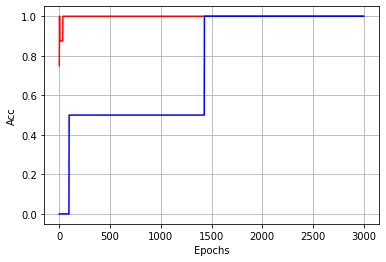

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(history.epoch)), history.history['acc'], color='red'  )
plt.plot(range(len(history.epoch)), history.history['val_acc'], color='blue'  )
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.grid()
plt.show()

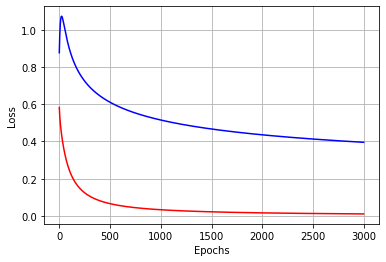

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(history.epoch)), history.history['loss'], color='red'  )
plt.plot(range(len(history.epoch)), history.history['val_loss'], color='blue'  )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()